<a href="https://colab.research.google.com/github/adbayre/Quant-Option-Portfolio/blob/main/Mod%C3%A8le_SABR_Compr%C3%A9hension_et_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Partie Théorique — Étude progressive des modèles de pricing — du CRR au SABR

Ce notebook s’inscrit dans le cadre du projet **PI² – Plateforme de pricing CRR**.  
Notre objectif est de construire une plateforme de pricing robuste et pédagogique à partir du modèle de **Cox–Ross–Rubinstein (CRR)**.  
Mais pour maîtriser vraiment ce que l’on fait, il est essentiel de **comprendre l’histoire et la logique** derrière ce modèle :  
comment il est né, sur quelles hypothèses il repose, et jusqu’où il peut être amélioré.

Avant de coder, il est donc utile de replacer le CRR dans le **cheminement global des modèles de pricing** —  
depuis les fondations de **Black–Scholes**, jusqu’aux modèles à **volatilité stochastique** comme **Heston** et **SABR**.  
Tous partent de la même idée : chercher un **prix juste dans un marché incertain**,  
mais chacun y ajoute sa propre vision du risque, de la volatilité et du réalisme.

Cette partie n’est pas un simple rappel théorique :  
elle sert à **donner du sens au projet**, à comprendre **comment chaque modèle corrige les limites du précédent**,  
et surtout à voir **comment ces approches peuvent inspirer les futures évolutions de notre plateforme**.

C’est une façon de relier **la théorie, la pratique et la vision long terme du projet**,  
en posant une base commune de compréhension pour toute l’équipe.

*(PS: Et si vous êtes déjà à l’aise avec ces notions, vous pouvez bien sûr ouvrir directement les sections qui vous intéressent😄)*  


---

<details>
<summary><strong>Introduction : Compréhension progressive des modèles menant au modèle SABR (cliquer pour ouvrir)</strong></summary>

Avant d’entrer dans le modèle **SABR**, il est important de revenir sur les grandes étapes qui mènent jusqu’à lui :  
le modèle binomial de **Cox–Ross–Rubinstein (CRR)**, la transition vers **Black–Scholes**,  
et enfin les modèles à **volatilité stochastique** comme **Heston**.  

Chaque modèle a apporté une idée nouvelle, mais aussi révélé ses propres limites.  
C’est cette succession d’améliorations et d’ajustements qui a conduit à **SABR**,  
un modèle capable de mieux représenter la réalité des marchés et d’inspirer les développements à venir.

</details>



---

<details>
<summary><strong>1. Comprendre ce qu’est une option</strong></summary>

Une **option** est un contrat financier qui donne un **droit**, mais pas une obligation, d’acheter ou de vendre un actif (comme une action) à un prix fixé à l’avance, appelé **strike**, à une date future.

- **Call** → droit d’acheter à un prix donné.  
- **Put** → droit de vendre à un prix donné.  

Quand on achète une option, on paye une **prime** aujourd’hui.  
La vraie question, c’est :  

> Combien cette prime vaut-elle vraiment ?

C’est ce qu’on appelle le **pricing** : trouver la valeur “juste” d’une option dès maintenant, alors que son résultat dépend du futur.  
Tout le but des modèles qu’on va voir est de répondre à cette question de manière rationnelle.

</details>

---

<details>
<summary><strong>2. Pourquoi on a besoin de modèles de pricing</strong></summary>

Un modèle de pricing sert à donner une **valeur cohérente** à un produit financier incertain.  
Pour cela, il faut décrire comment évolue le prix de l’actif dans le temps.  
En clair : *comment un marché bouge-t-il, et comment peut-on modéliser ce mouvement ?*

Les modèles financiers sont donc des **représentations mathématiques de l’incertitude**, qui permettent de comprendre le risque, d’évaluer les produits, et d’éviter les incohérences comme les opportunités d’arbitrage (gagner sans risque).

</details>

---

<details>
<summary><strong>3. Premier modèle : CRR (modèle binomial)</strong></summary>

Le modèle **Cox–Ross–Rubinstein (CRR)** est souvent la première pierre.  
Il simplifie le marché : à chaque période, le prix d’un actif peut soit **monter** (u), soit **descendre** (d).  

C’est un modèle **discret**, simple à visualiser.  
Il permet déjà de :
- calculer le prix d’une option,  
- construire une **stratégie de couverture** (hedging),  
- et vérifier que le marché reste **sans arbitrage**.

Ce modèle apprend une chose essentielle :  
> on peut donner un prix logique à une option sans “parier” sur la hausse ou la baisse, mais simplement en équilibrant les risques entre deux états du monde.

</details>

---

<details>
<summary><strong>4. Passage au continu : le modèle de Black–Scholes</strong></summary>

Le modèle **Black–Scholes** rend le raisonnement plus fluide et réaliste.  
Ici, le prix de l’actif ne saute plus entre deux valeurs, il **évolue de manière continue**, en suivant un mouvement aléatoire.

On le décrit par l’équation :

$$
dS_t = \mu S_t \, dt + \sigma S_t \, dW_t
$$

où :
- $S_t$ : prix de l’actif à l’instant t  
- $\mu$ : rendement moyen  
- $\sigma$ : volatilité (intensité du risque)  
- $dW_t$ : petit mouvement aléatoire (le “bruit” du marché)

Black–Scholes fait une hypothèse forte : **la volatilité est constante**.  
C’est ce qui rend le modèle simple, mais c’est aussi sa plus grande limite, car dans la vraie vie, les marchés sont tout sauf constants.

</details>

---

<details>
<summary><strong>5. Les limites de Black–Scholes</strong></summary>

Sur les marchés réels :
- la **volatilité n’est pas stable**,  
- elle **change avec le temps**,  
- et elle **dépend souvent du prix** ou de la **maturité** de l’option.

Quand on regarde la volatilité implicite des options (celle déduite de leurs prix observés), on voit des **courbes en sourire ou en biais** (*volatility smile* et *skew*).  
Ces formes montrent clairement que le modèle Black–Scholes ne reflète pas la réalité du comportement des marchés.

</details>

---

<details>
<summary><strong>6. L’arrivée des modèles à volatilité stochastique</strong></summary>

Pour mieux représenter ce qu’on observe, on a introduit des modèles où la **volatilité elle-même devient aléatoire**.  
On parle alors de **volatilité stochastique**.

Deux modèles sont devenus des références :
1. **Heston** → la volatilité suit sa propre équation, elle oscille autour d’une moyenne (modèle plus théorique).  
2. **SABR** → la volatilité et le prix bougent ensemble, de manière corrélée (modèle plus empirique et calibrable).

Ces modèles sont plus réalistes, mais ils demandent une compréhension plus fine et une bonne maîtrise de la calibration.

</details>

---

<details>
<summary><strong>7. Comprendre le modèle SABR (intuitivement)</strong></summary>

Le modèle **SABR** (*Stochastic Alpha Beta Rho*) cherche à capturer **le comportement réel des marchés**, où le prix et la volatilité évoluent ensemble, parfois dans le même sens, parfois dans le sens opposé.

Pour se le représenter simplement :  
Imagine que le **prix de l’actif** est une barque, et que la **volatilité** est la mer.  
Dans le modèle Black–Scholes, on suppose que la mer est plate : la barque bouge, mais sur une surface parfaitement calme.  
Dans SABR, la mer devient vivante — elle forme des vagues, parfois calmes, parfois fortes — et ces vagues influencent la barque.  
Parfois, le vent pousse la barque et la mer dans la même direction, parfois non.  
C’est exactement cela que modélise SABR : un marché qui respire, où le prix et la volatilité se déplacent ensemble.

Mathématiquement, on écrit :

$$
\begin{cases}
dF_t = \sigma_t F_t^{\beta} dW_t^{(1)} \\
d\sigma_t = \alpha \sigma_t dW_t^{(2)} \\
corr(dW_t^{(1)}, dW_t^{(2)}) = \rho
\end{cases}
$$

Et en pratique :
- **α (alpha)** contrôle l’intensité des mouvements de volatilité,  
- **β (beta)** décrit comment le prix réagit (1 = Black–Scholes, <1 = plus réaliste),  
- **ρ (rho)** indique la corrélation entre le prix et la volatilité.

Si ρ est négatif, cela signifie qu’en général, quand le prix monte, la volatilité baisse — c’est souvent ce qu’on observe sur les marchés actions.

On peut voir SABR comme un modèle **vivant** : le prix et la volatilité dansent ensemble, parfois en harmonie, parfois en opposition.  
C’est ce lien qui permet au modèle de **reproduire la forme réelle des volatilités observées sur les marchés** — le fameux *smile*.

</details>

---

<details>
<summary><strong>8. La place du SABR dans le projet</strong></summary>

Dans notre projet **PI²**, le modèle SABR correspond à la **phase avancée** de la recherche.  
C’est le modèle qui vient après la compréhension des bases (CRR, Black–Scholes, Heston) et qui vise à **connecter la théorie à la réalité du marché**.

| Étape | Modèle | Objectif |
|:------|:--------|:----------|
| 1 | CRR | Comprendre la logique du pricing et du hedging |
| 2 | Black–Scholes | Passer à un modèle continu |
| 3 | Heston | Introduire une volatilité aléatoire réaliste |
| 4 | SABR | Ajuster le modèle pour coller aux données réelles |

SABR est utilisé dans la pratique pour **calibrer les surfaces de volatilité** observées sur le marché.  
C’est un outil concret, entre la théorie mathématique et la finance appliquée.

</details>

---

<details>
<summary><strong>9. Synthèse générale</strong></summary>

Avant d’arriver à SABR, il faut comprendre :
- ce qu’est une option et comment on la price,  
- comment le prix d’un actif évolue dans le temps,  
- pourquoi la volatilité joue un rôle central,  
- et comment la corrélation entre prix et volatilité influence le marché.

Le modèle SABR est une **synthèse entre simplicité et réalisme** :  
il garde la clarté de Black–Scholes tout en ajoutant la dynamique du monde réel.  
C’est une manière cohérente et élégante de décrire un marché **vivant, corrélé et imprévisible**, mais toujours modélisable.

</details>

---

<details>
<summary><strong>10. Les limites du modèle SABR</strong></summary>

Comme tout modèle, SABR n’est pas parfait.  
Il cherche à mieux coller à la réalité que Black–Scholes, mais il repose lui aussi sur certaines hypothèses simplificatrices.

Voici les principales limites du modèle :

1. **Il reste un modèle approché.**  
   SABR n’a pas de solution exacte pour le prix des options.  
   On utilise souvent une **formule approchée de volatilité implicite** (formule de Hagan et al., 2002), qui fonctionne bien, mais peut perdre en précision dans certains cas extrêmes.

2. **Les paramètres sont parfois instables.**  
   Les trois paramètres principaux ($\alpha$, $\beta$, $\rho$) peuvent varier beaucoup selon la période ou les conditions de marché.  
   Cela rend la calibration (l’ajustement du modèle aux données réelles) délicate.

3. **Le modèle peut diverger pour des taux de volatilité très élevés.**  
   Si la volatilité devient trop forte, ou si les prix des options s’éloignent trop du strike central, le modèle donne parfois des valeurs incohérentes.

4. **Le modèle reste statique dans le temps.**  
   SABR décrit bien la forme d’une surface de volatilité à un instant donné, mais il ne modélise pas bien **l’évolution de cette surface dans le temps**.  
   Pour cela, d’autres extensions (comme le modèle SABR dynamique ou les modèles de “local stochastic volatility”) sont parfois utilisées.

En résumé, SABR est un modèle puissant, simple à calibrer et très utile en pratique,  
mais il faut garder à l’esprit que c’est **une approximation**, pas une description parfaite du marché.  
Il sert surtout de **compromis entre précision et simplicité** : un outil efficace, à condition de bien connaître ses limites.

</details>

---

<details>
<summary><strong>11. Pourquoi il n’existe pas de modèle parfait</strong></summary>

Aucun modèle financier ne peut décrire parfaitement le comportement des marchés.  
Chaque modèle repose sur des hypothèses simplificatrices — stabilité des paramètres, rationalité des acteurs, continuité des prix — qui ne sont jamais totalement vraies dans la réalité.

Les marchés sont des systèmes complexes, influencés par des facteurs humains, politiques et psychologiques qu’aucune équation ne peut entièrement modéliser.  
Chaque modèle cherche donc un équilibre entre **réalisme et efficacité** : assez précis pour être utile, mais assez simple pour être exploitable.

Le modèle **SABR** illustre bien cette logique : il ne prétend pas tout expliquer, mais il offre un compromis solide entre rigueur mathématique et comportement réel du marché.  

D’autres approches plus récentes ont tenté d’aller plus loin :
- Les **modèles à sauts** (Merton, Bates) intègrent des variations soudaines de prix, utiles en période de crise.  
- Les **modèles de volatilité locale** reproduisent fidèlement la surface de volatilité observée, mais manquent de pouvoir prédictif.  
- Les **modèles hybrides** ou **local stochastic volatility (LSV)** combinent plusieurs effets, mais deviennent très lourds à calibrer.  
- Plus récemment, les **modèles de volatilité rugueuse (Rough Volatility)** décrivent une volatilité “irrégulière” et fractale, mais restent encore difficiles à utiliser en pratique.

Aucun de ces modèles n’est universel : chacun répond à un besoin spécifique, dans un certain contexte.  
C’est ce qui fait que, plus qu’un modèle parfait, la finance cherche avant tout **des outils cohérents et adaptés à chaque situation**.  

C’est ce qui fait la force du SABR : il ne vise pas la perfection, mais la **stabilité et la cohérence** dans un monde incertain.

</details>


# Partie pratique — Simulation et présentation du modèle SABR

Cette partie a pour but de **voir SABR en action**.  
On ne cherche pas à faire du pricing, mais à comprendre **comment le modèle se comporte** et comment ses paramètres influencent la dynamique du prix et de la volatilité.

Concrètement, on va :
- observer la **relation entre le prix et la volatilité**,  
- tester l’effet des paramètres principaux (**α**, **β**, **ρ**),  
- et comparer ces comportements avec ceux de modèles plus simples (comme Black–Scholes).

L’objectif : transformer les idées vues dans la théorie en **intuitions visuelles et concrètes**.

## Compréhension intuitive du modèle SABR

Le modèle SABR décrit un marché **vivant**, où le prix d’un actif et sa volatilité se déplacent **ensemble**, souvent de manière **corrélée**.  
Cette interaction est essentielle : elle explique des phénomènes de marché qu’un modèle comme Black–Scholes ne peut pas reproduire (par exemple le *volatility smile*).

Les simulations qui suivent permettront de **voir cette relation évoluer dans le temps**, et de comprendre comment chaque paramètre contribue à la forme du mouvement.

## 1. Corrélation entre le prix et la volatilité (ρ)

Le paramètre **ρ (rho)** mesure la **corrélation entre le prix de l’actif et sa volatilité**.

- Quand **ρ > 0**, le prix et la volatilité évoluent dans le même sens.  
- Quand **ρ < 0**, ils bougent en sens inverse (cas typique des marchés actions).  
- Quand **ρ = 0**, ils sont indépendants.

C’est un paramètre clé : il contrôle la façon dont les deux courbes “dansent” ensemble.  
On va donc **simuler plusieurs valeurs de ρ** pour voir comment cette relation modifie la forme des trajectoires.

*Idée de lecture du graphique à venir :*  
Regarde si la volatilité baisse quand le prix monte (corrélation négative), ou au contraire, si les deux montent ensemble (corrélation positive).  
C’est exactement ce que SABR cherche à capturer.

---


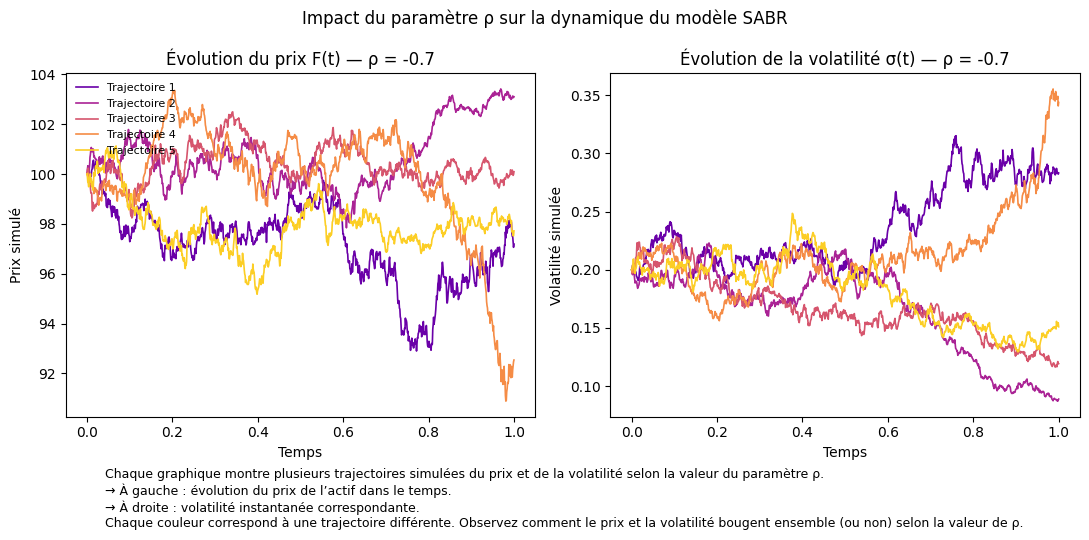

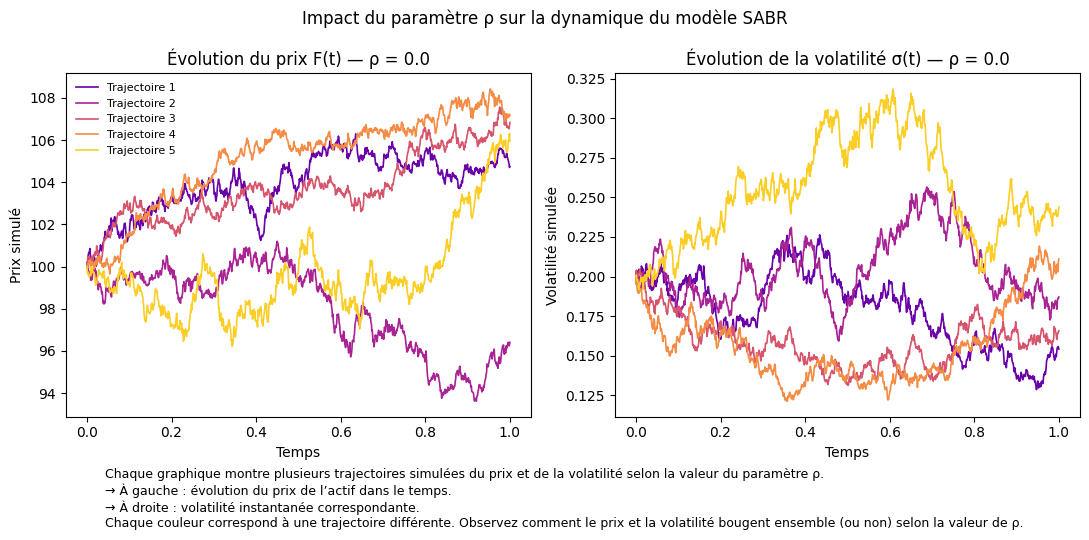

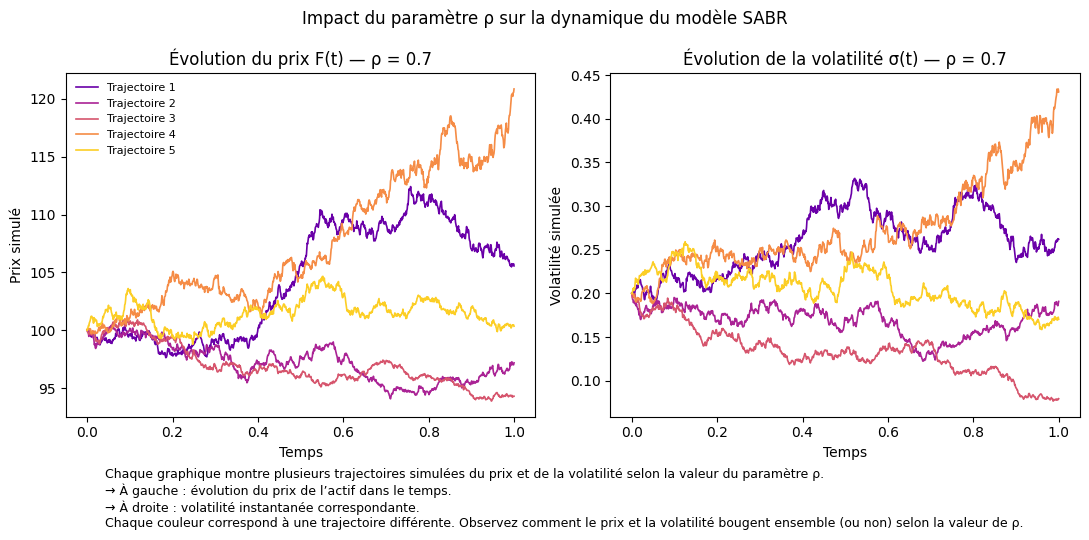


---

### Conclusion sur ρ — la corrélation entre le prix et la volatilité

Le paramètre **ρ (rho)** contrôle la relation entre le prix et la volatilité :  
il détermine s’ils évoluent ensemble ou en opposition.

Quand **ρ > 0**, on voit que le prix et la volatilité montent ou descendent ensemble :  
le marché a tendance à s’emballer dans une même direction.  

Quand **ρ < 0**, le comportement devient inverse :  
lorsque le prix monte, la volatilité baisse — un phénomène typique sur les marchés actions.  

Et quand **ρ = 0**, les deux évoluent sans lien particulier.  

Ce paramètre est donc essentiel : **il gouverne la “danse” entre le prix et la volatilité**,  
et permet au modèle SABR de reproduire des comportements de marché impossibles à capturer avec Black–Scholes.



In [10]:
import numpy as np
import matplotlib.pyplot as plt

# --- Paramètres de base ---
T = 1.0
N = 1000
dt = T / N
t = np.linspace(0, T, N)

F0 = 100
sigma0 = 0.2
alpha = 0.4
beta = 0.7
rhos = [-0.7, 0.0, 0.7]
n_paths = 5

# --- Simulation et visualisation ---
for rho in rhos:
    cov = np.array([[1, rho], [rho, 1]])
    L = np.linalg.cholesky(cov)

    F_paths = np.zeros((n_paths, N))
    sigma_paths = np.zeros((n_paths, N))

    for i in range(n_paths):
        F, sigma = F0, sigma0
        F_series = [F]
        sigma_series = [sigma]

        for _ in range(1, N):
            dW = np.random.normal(0, np.sqrt(dt), 2)
            dW1, dW2 = L @ dW

            sigma = sigma + alpha * sigma * dW2
            F = F + sigma * (F ** beta) * dW1

            F_series.append(F)
            sigma_series.append(sigma)

        F_paths[i, :] = F_series
        sigma_paths[i, :] = sigma_series

    # --- Visualisation ---
    colors = plt.cm.plasma(np.linspace(0.2, 0.9, n_paths))

    fig, ax = plt.subplots(1, 2, figsize=(11, 5))

    for i in range(n_paths):
        ax[0].plot(t, F_paths[i], color=colors[i], lw=1.2)
        ax[1].plot(t, sigma_paths[i], color=colors[i], lw=1.2)

    ax[0].set_title(f"Évolution du prix F(t) — ρ = {rho}")
    ax[0].set_xlabel("Temps")
    ax[0].set_ylabel("Prix simulé")

    ax[1].set_title(f"Évolution de la volatilité σ(t) — ρ = {rho}")
    ax[1].set_xlabel("Temps")
    ax[1].set_ylabel("Volatilité simulée")

    # Légendes simples
    ax[0].legend([f"Trajectoire {i+1}" for i in range(n_paths)],
                 loc="upper left", fontsize=8, frameon=False)

    plt.suptitle(f"Impact du paramètre ρ sur la dynamique du modèle SABR", fontsize=12)

    # --- Texte explicatif intégré sous le graphique ---
    plt.figtext(
        0.1, -0.05,
        "Chaque graphique montre plusieurs trajectoires simulées du prix et de la volatilité selon la valeur du paramètre ρ.\n"
        "→ À gauche : évolution du prix de l’actif dans le temps.\n"
        "→ À droite : volatilité instantanée correspondante.\n"
        "Chaque couleur correspond à une trajectoire différente. "
        "Observez comment le prix et la volatilité bougent ensemble (ou non) selon la valeur de ρ.",
        wrap=True, ha="left", fontsize=9
    )

    plt.tight_layout(rect=[0, 0.05, 1, 1])  # laisse de la place pour le texte
    plt.show()

# --- Une seule conclusion finale, affichée après toutes les figures ---
display(Markdown("""
---

### Conclusion sur ρ — la corrélation entre le prix et la volatilité

Le paramètre **ρ (rho)** contrôle la relation entre le prix et la volatilité :
il détermine s’ils évoluent ensemble ou en opposition.

Quand **ρ > 0**, on voit que le prix et la volatilité montent ou descendent ensemble :
le marché a tendance à s’emballer dans une même direction.

Quand **ρ < 0**, le comportement devient inverse :
lorsque le prix monte, la volatilité baisse — un phénomène typique sur les marchés actions.

Et quand **ρ = 0**, les deux évoluent sans lien particulier.

Ce paramètre est donc essentiel : **il gouverne la “danse” entre le prix et la volatilité**,
et permet au modèle SABR de reproduire des comportements de marché impossibles à capturer avec Black–Scholes.

"""))

---

## 2. Effet du paramètre α — la "volatilité de la volatilité"

Le paramètre **α (alpha)** indique à quel point la **volatilité elle-même est instable**.  
C’est ce qu’on appelle parfois la *vol of vol* : plus α est élevé, plus la volatilité devient imprévisible,  
et donc plus le prix de l’actif peut connaître des mouvements brusques.

En résumé :
- Quand **α est faible**, le marché est calme et régulier.  
- Quand **α est fort**, les conditions deviennent chaotiques : la volatilité s’emballe, et le prix suit un mouvement beaucoup plus erratique.

L’objectif ici est de **voir visuellement** comment ce paramètre influence la dynamique du prix et de la volatilité.  
On garde les autres paramètres constants et on fait varier α pour observer les différences de comportement.



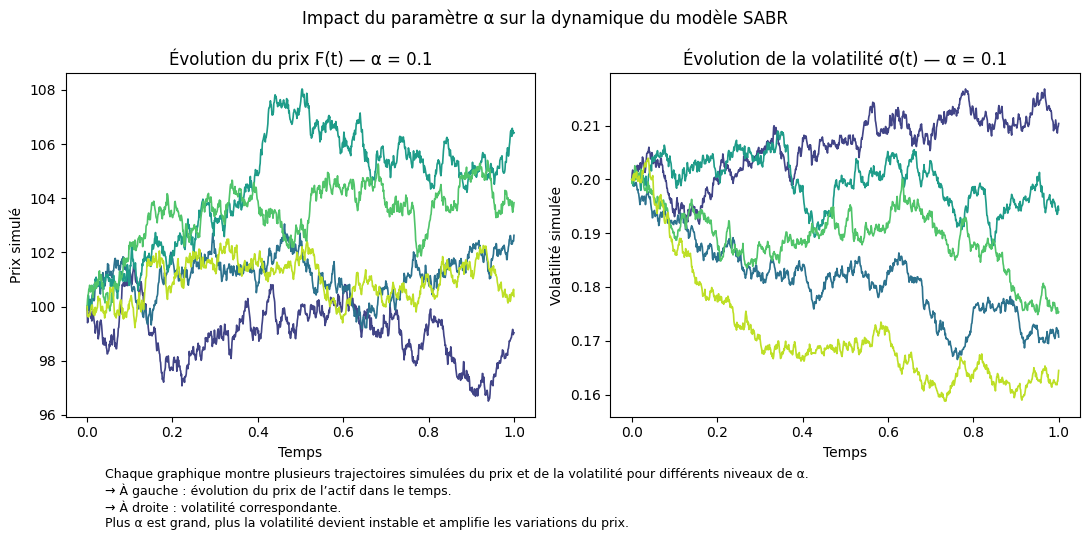

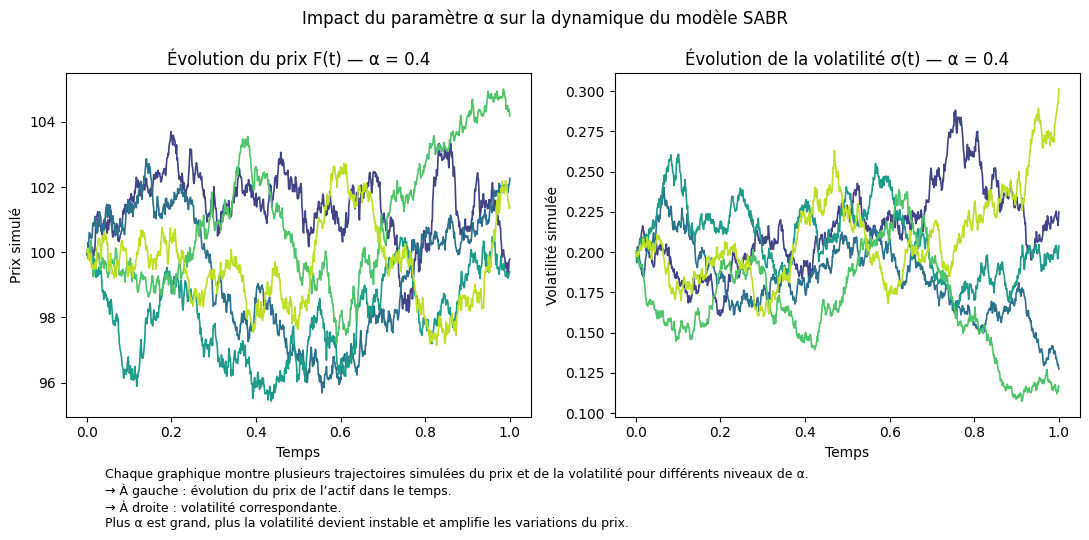

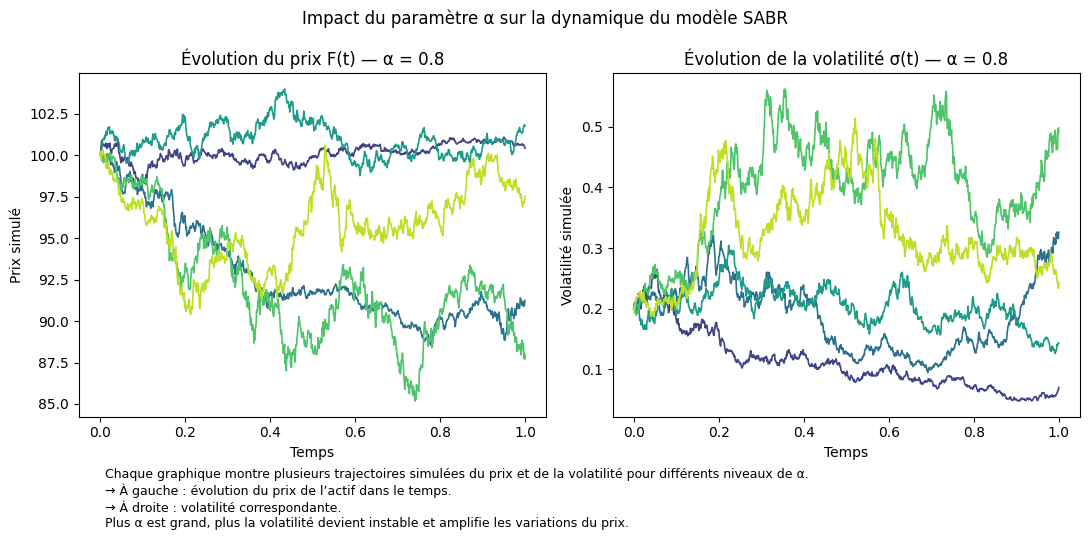


---

### Conclusion sur α — la "volatilité de la volatilité"

Ici on observe très bien le rôle du paramètre **α**.  
Quand α est petit, la volatilité varie lentement, le marché est calme.

Mais quand α devient plus grand, la volatilité devient beaucoup plus instable :  
on voit des pics, des creux, des périodes d’agitation.  
Et comme la volatilité influence directement le prix, le marché devient beaucoup plus nerveux.

C’est un point fondamental : **α contrôle le tempérament du marché.**



In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres généraux
T = 1.0
N = 1000
dt = T / N
t = np.linspace(0, T, N)

F0 = 100
sigma0 = 0.2
beta = 0.7
rho = -0.4          # corrélation modérée négative
alphas = [0.1, 0.4, 0.8]  # différents niveaux de volatilité de la volatilité
n_paths = 5

for alpha in alphas:
    cov = np.array([[1, rho], [rho, 1]])
    L = np.linalg.cholesky(cov)

    F_paths = np.zeros((n_paths, N))
    sigma_paths = np.zeros((n_paths, N))

    for i in range(n_paths):
        F, sigma = F0, sigma0
        F_series = [F]
        sigma_series = [sigma]

        for _ in range(1, N):
            dW = np.random.normal(0, np.sqrt(dt), 2)
            dW1, dW2 = L @ dW

            sigma = sigma + alpha * sigma * dW2
            F = F + sigma * (F ** beta) * dW1

            F_series.append(F)
            sigma_series.append(sigma)

        F_paths[i, :] = F_series
        sigma_paths[i, :] = sigma_series

    # --- Visualisation ---
    colors = plt.cm.viridis(np.linspace(0.2, 0.9, n_paths))
    fig, ax = plt.subplots(1, 2, figsize=(11, 5))

    for i in range(n_paths):
        ax[0].plot(t, F_paths[i], color=colors[i], lw=1.2)
        ax[1].plot(t, sigma_paths[i], color=colors[i], lw=1.2)

    ax[0].set_title(f"Évolution du prix F(t) — α = {alpha}")
    ax[0].set_xlabel("Temps")
    ax[0].set_ylabel("Prix simulé")

    ax[1].set_title(f"Évolution de la volatilité σ(t) — α = {alpha}")
    ax[1].set_xlabel("Temps")
    ax[1].set_ylabel("Volatilité simulée")

    plt.suptitle(f"Impact du paramètre α sur la dynamique du modèle SABR", fontsize=12)

    plt.figtext(
        0.1, -0.05,
        "Chaque graphique montre plusieurs trajectoires simulées du prix et de la volatilité pour différents niveaux de α.\n"
        "→ À gauche : évolution du prix de l’actif dans le temps.\n"
        "→ À droite : volatilité correspondante.\n"
        "Plus α est grand, plus la volatilité devient instable et amplifie les variations du prix.",
        wrap=True, ha="left", fontsize=9
    )

    plt.tight_layout(rect=[0, 0.05, 1, 1])
    plt.show()


# --- Une seule conclusion finale, affichée après toutes les figures ---
from IPython.display import Markdown, display

display(Markdown("""
---

### Conclusion sur α — la "volatilité de la volatilité"

Ici on observe très bien le rôle du paramètre **α**.
Quand α est petit, la volatilité varie lentement, le marché est calme.

Mais quand α devient plus grand, la volatilité devient beaucoup plus instable :
on voit des pics, des creux, des périodes d’agitation.
Et comme la volatilité influence directement le prix, le marché devient beaucoup plus nerveux.

C’est un point fondamental : **α contrôle le tempérament du marché.**

"""))


---

## 3. Le rôle du paramètre β (bêta)

Le paramètre **β** contrôle la façon dont la **volatilité influence le prix**.  
C’est en quelque sorte la *sensibilité du marché*.

- **β = 1** → on retrouve le modèle Black–Scholes : le prix réagit fortement à la volatilité.  
- **β < 1** → les variations du prix sont plus douces, plus réalistes.  
- **β ≈ 0** → la volatilité n’a presque plus d’effet : le marché devient plus rigide.

L’objectif ici est simple : **voir comment le comportement du prix change quand on fait varier β**,  
et comprendre comment ce paramètre rend le modèle SABR plus flexible que Black–Scholes.


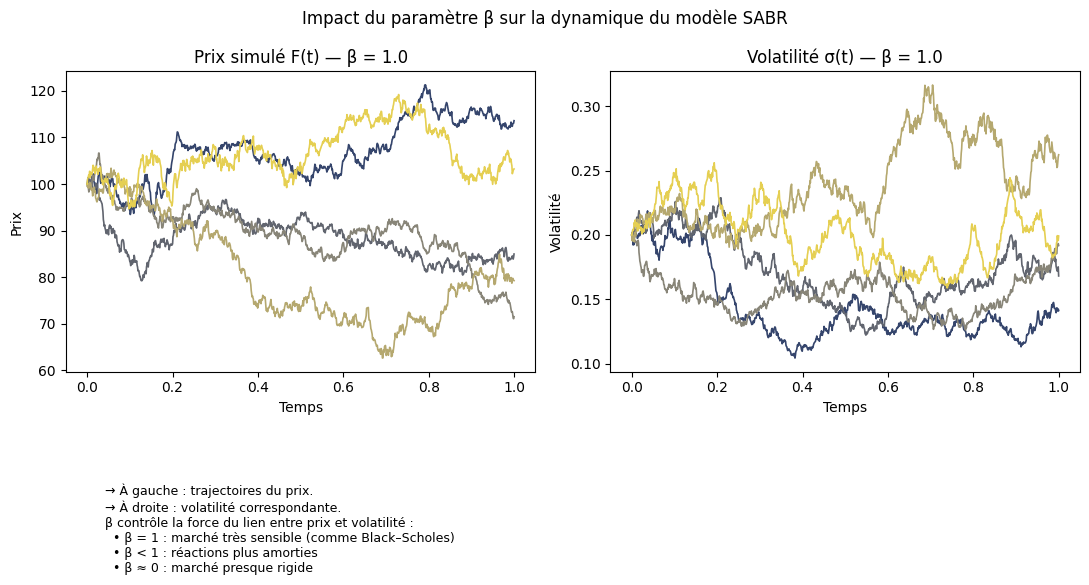

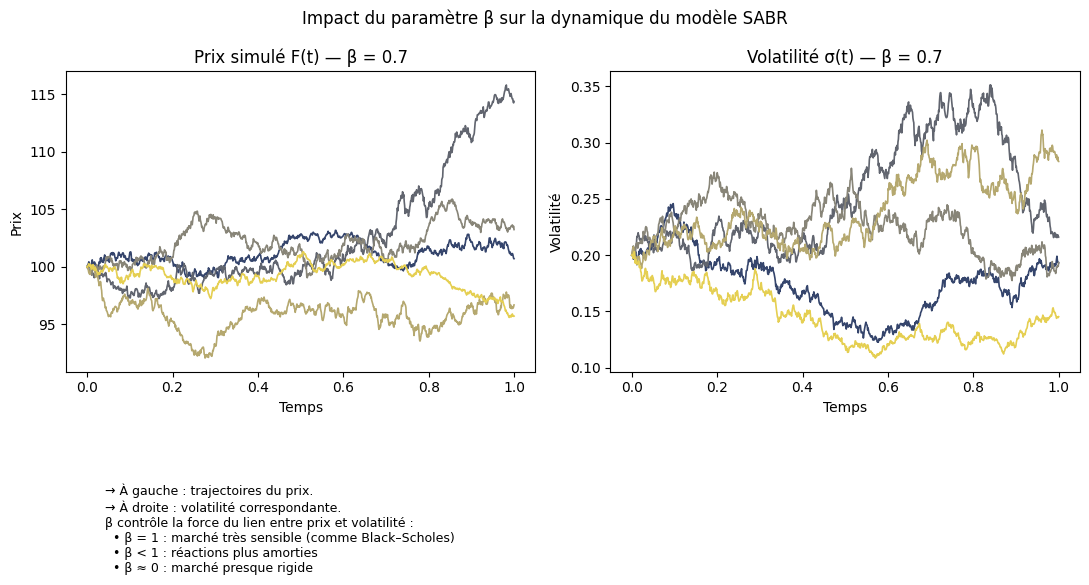

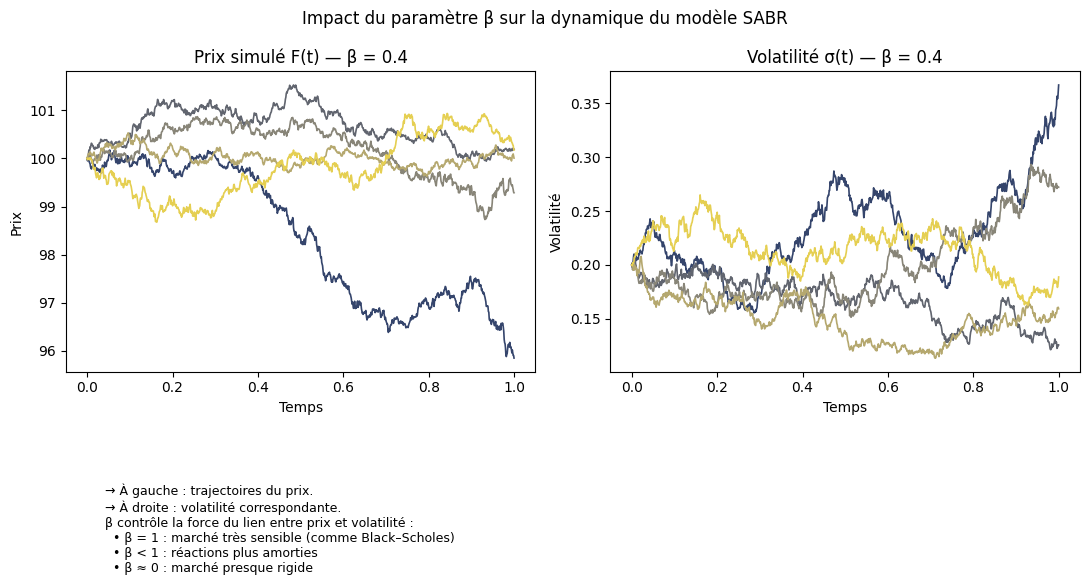


---

### En résumé sur β

Le paramètre **β** règle la sensibilité du prix à la volatilité.  
Quand **β = 1**, on retrouve Black–Scholes : un marché très réactif.  
Quand **β < 1**, les mouvements sont plus amortis — plus proches de la réalité.  

C’est grâce à β que SABR peut ajuster son comportement selon le type de marché.

---


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

# --- Paramètres de base ---
T = 1.0
N = 1000
dt = T / N
t = np.linspace(0, T, N)

F0 = 100
sigma0 = 0.2
alpha = 0.4
rho = -0.4
betas = [1.0, 0.7, 0.4]
n_paths = 5

# --- Simulation et visualisation ---
for beta in betas:
    cov = np.array([[1, rho], [rho, 1]])
    L = np.linalg.cholesky(cov)

    F_paths = np.zeros((n_paths, N))
    sigma_paths = np.zeros((n_paths, N))

    for i in range(n_paths):
        F, sigma = F0, sigma0
        F_series, sigma_series = [F], [sigma]

        for _ in range(1, N):
            dW = np.random.normal(0, np.sqrt(dt), 2)
            dW1, dW2 = L @ dW

            sigma += alpha * sigma * dW2
            F += sigma * (F ** beta) * dW1

            F_series.append(F)
            sigma_series.append(sigma)

        F_paths[i, :] = F_series
        sigma_paths[i, :] = sigma_series

    # --- Visualisation ---
    colors = plt.cm.cividis(np.linspace(0.2, 0.9, n_paths))
    fig, ax = plt.subplots(1, 2, figsize=(11, 5))

    for i in range(n_paths):
        ax[0].plot(t, F_paths[i], color=colors[i], lw=1.2)
        ax[1].plot(t, sigma_paths[i], color=colors[i], lw=1.2)

    ax[0].set_title(f"Prix simulé F(t) — β = {beta}")
    ax[0].set_xlabel("Temps")
    ax[0].set_ylabel("Prix")

    ax[1].set_title(f"Volatilité σ(t) — β = {beta}")
    ax[1].set_xlabel("Temps")
    ax[1].set_ylabel("Volatilité")

    plt.suptitle(f"Impact du paramètre β sur la dynamique du modèle SABR", fontsize=12)

    # --- Texte explicatif intégré (avec bon espacement) ---
    plt.figtext(
        0.1, -0.14,  # décalé plus bas pour bien respirer
        "→ À gauche : trajectoires du prix.\n"
        "→ À droite : volatilité correspondante.\n"
        "β contrôle la force du lien entre prix et volatilité :\n"
        "  • β = 1 : marché très sensible (comme Black–Scholes)\n"
        "  • β < 1 : réactions plus amorties\n"
        "  • β ≈ 0 : marché presque rigide",
        wrap=True, ha="left", fontsize=9
    )

    plt.tight_layout(rect=[0, 0.14, 1, 1])  # on agrandit la marge pour le texte
    plt.show()


# --- Conclusion finale (courte et claire) ---
display(Markdown("""
---

### En résumé sur β

Le paramètre **β** règle la sensibilité du prix à la volatilité.
Quand **β = 1**, on retrouve Black–Scholes : un marché très réactif.
Quand **β < 1**, les mouvements sont plus amortis — plus proches de la réalité.

C’est grâce à β que SABR peut ajuster son comportement selon le type de marché.

---
"""))


## 4. Conclusion — Ce que révèlent les paramètres du modèle SABR

À travers ces simulations, on comprend mieux comment les trois paramètres clés du modèle **SABR** façonnent le comportement du marché :

- **ρ (rho)** : traduit la **corrélation** entre le prix et la volatilité.  
  Quand ρ < 0, le marché devient plus réaliste : la volatilité baisse quand le prix monte, comme on le voit souvent sur les marchés actions.

- **α (alpha)** : mesure la **vitesse et l’intensité** des variations de volatilité.  
  Un α élevé rend le marché nerveux, instable ; un α faible donne un environnement plus calme.

- **β (bêta)** : contrôle la **sensibilité du prix à la volatilité**.  
  Plus β est petit, plus les variations de prix sont amorties — un comportement qu’on observe souvent dans la réalité.

Ces trois paramètres, combinés, donnent à SABR sa force :  
il peut s’adapter à différents contextes de marché, en reproduisant des comportements impossibles à capter avec un modèle comme Black–Scholes.  

> En résumé, SABR n’est pas qu’une formule : c’est une façon de faire “vivre” les marchés à travers la simulation.


## 5. Comparaison appliquée — Black–Scholes vs SABR sur une option "ESILV"

Pour rendre la comparaison plus concrète, on simule ici **le prix d’une option call sur l’action “ESILV”**
(bien sûr fictive, mais l’idée est la même que pour une vraie action du marché).

Les deux modèles partent des **mêmes conditions de départ** :
- même prix initial,  
- même volatilité de base,  
- même horizon temporel.

La seule différence :  
- dans **Black–Scholes**, la volatilité reste fixe,  
- dans **SABR**, elle vit et réagit au marché.

L’objectif est de voir **comment ces hypothèses changent la dynamique des prix** d’un même actif.


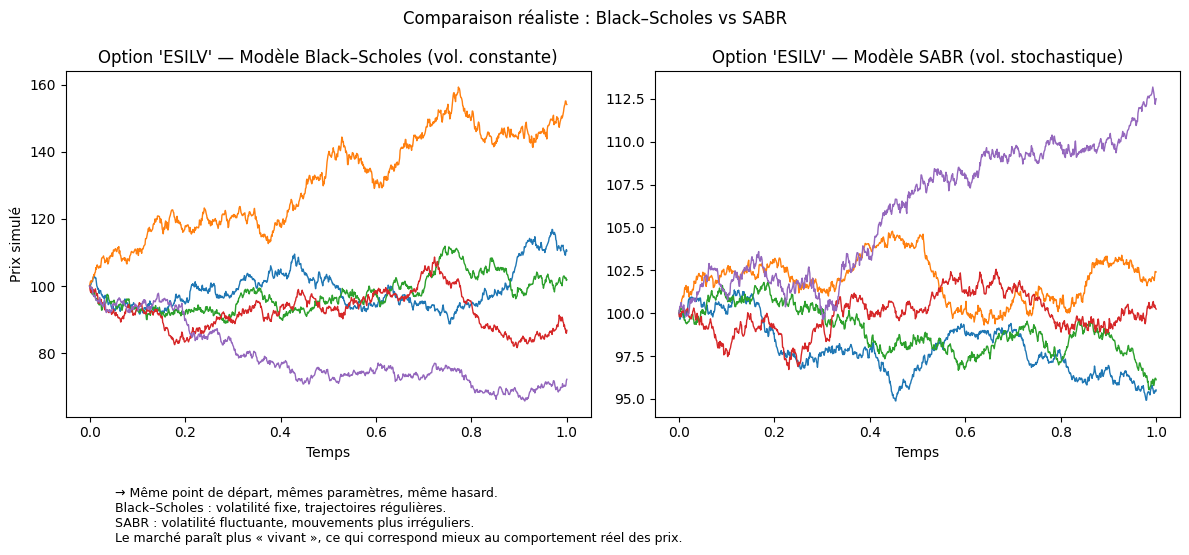

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# --- Paramètres de base ---
np.random.seed(42)
T, N = 1.0, 1000
dt = T / N
t = np.linspace(0, T, N)

F0 = 100
sigma0 = 0.20
alpha = 0.25   # rend la volatilité "vivante" sans exploser
beta = 0.7
rho = -0.3
mu = 0.0
n_paths = 5

# Même source aléatoire pour comparaison directe
Z = np.random.normal(0, 1, (n_paths, N)) * np.sqrt(dt)

# --- Black-Scholes ---
F_bs = np.zeros((n_paths, N))
for i in range(n_paths):
    F = F0
    F_series = [F]
    for dW in Z[i]:
        F += mu * F * dt + sigma0 * F * dW
        F_series.append(F)
    F_bs[i] = F_series[:N]

# --- SABR ---
F_sabr = np.zeros((n_paths, N))
for i in range(n_paths):
    F, sigma = F0, sigma0
    F_series = [F]
    for _ in range(1, N):
        dW1 = np.random.normal(0, np.sqrt(dt))
        dW2 = rho * dW1 + np.sqrt(1 - rho**2) * np.random.normal(0, np.sqrt(dt))
        sigma = np.clip(sigma + alpha * sigma * dW2, 0.05, 0.6)
        F += sigma * (F ** beta) * dW1
        F_series.append(F)
    F_sabr[i] = F_series[:N]

# --- Visualisation ---
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
for i in range(n_paths):
    ax[0].plot(t, F_bs[i], lw=1)
    ax[1].plot(t, F_sabr[i], lw=1)

ax[0].set_title("Option 'ESILV' — Modèle Black–Scholes (vol. constante)")
ax[1].set_title("Option 'ESILV' — Modèle SABR (vol. stochastique)")
for a in ax:
    a.set_xlabel("Temps")
ax[0].set_ylabel("Prix simulé")

plt.suptitle("Comparaison réaliste : Black–Scholes vs SABR", fontsize=12)

plt.figtext(
    0.1, -0.08,
    "→ Même point de départ, mêmes paramètres, même hasard.\n"
    "Black–Scholes : volatilité fixe, trajectoires régulières.\n"
    "SABR : volatilité fluctuante, mouvements plus irréguliers.\n"
    "Le marché paraît plus « vivant », ce qui correspond mieux au comportement réel des prix.",
    wrap=True, ha="left", fontsize=9
)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


### Conclusion — Lecture concrète des graphiques

Sur les deux figures, les trajectoires de prix représentent l’évolution simulée d’une option "ESILV" sous deux modèles :

- **À gauche : le modèle de Black–Scholes**  
  On voit des courbes **assez lisses et régulières**.  
  La volatilité étant constante, le marché semble **prévisible et stable** :  
  les écarts entre trajectoires restent limités, et aucune ne s’écarte vraiment du groupe.

- **À droite : le modèle SABR**  
  Ici, les courbes conservent **le même niveau moyen**, mais leurs mouvements sont **plus irréguliers**.  
  Certaines trajectoires montent plus vite, d’autres plongent plus bas :  
  cela reflète l’effet d’une **volatilité stochastique**, qui varie au cours du temps.  
  Le marché paraît donc **plus vivant et plus réaliste**, avec des phases calmes et des phases d’agitation.

#### 🧩 Ce qu’il faut retenir
SABR ne modifie pas fondamentalement le niveau du prix,  
mais il **introduit de la variabilité dans la volatilité** —  
ce qui permet de reproduire les comportements observés sur les marchés réels.

C’est cette capacité à capter les changements de régime du marché  
qui fait de SABR un modèle plus robuste et plus crédible pour la **calibration et le pricing**.  

---

> **En résumé :** Black–Scholes donne une vision propre et théorique du marché,  
> tandis que SABR montre ce qu’on observe dans la réalité : des prix qui bougent,  
> parfois calmement, parfois brutalement — comme dans la vraie vie.
